# Breakdown of Immigration from China

A friend who reviewed [06-place-of-birth.ipynb](./06-place-of-birth.ipynb) asked if it was possible to breakdown immigration from China further, specifically to include Hong Kong and Taiwan. The answer is yes. While [B05006: Place of Birth for the Foreign-born Population in the United States](https://censusreporter.org/data/table/?table=B05006&geo_ids=97000US3612510&primary_geo_id=97000US3612510) is a table, it also has "nests" or "indents". These "nests" are not typical in database tables, but make perfect sense here. For example, the page I linked to has the following rows:
  * Asia: (some number)
    * Eastern Asia: (some number)
      * China: (some number)
        * China, excluding Hong Kong and Taiwan (some number)
        * Hong Kong (some number)
        * Taiwan (some number)

So the number for "China" is the sum of the 3 rows "nested" or "indented" beneath it.

The problem them becomes:
  1. What are the variables for the 3 countries of interest?
  2. Did any of those variables change labels during the period of interest?

I used the methodology outlined in [06-place-of-birth.ipynb](./06-place-of-birth.ipynb) to answer those questions. Rather than rehash that material here, I will just generate and comment on the data.

...

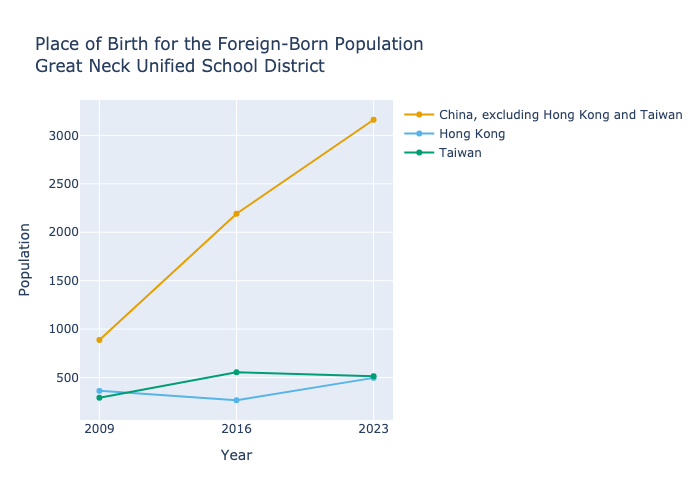

,"China, excluding Hong Kong and Taiwan",Hong Kong,Taiwan,Year
0,888,363,292,2009
0,2191,266,555,2016
0,3161,497,514,2023


In [3]:
from censusdis.datasets import ACS5
from censusdis.states import NY

from utils import download_multiyear, graph_multiyear


df = download_multiyear(
    dataset=ACS5,
    vintages=[2009, 2016, 2023],
    download_variables=["B05006_050E", "B05006_051E", "B05006_052E"],
    state=NY,
    school_district_unified="12510",
)

graph_multiyear(
    df,
    "Place of Birth for the Foreign-Born Population<br>Great Neck Unified School District",
    "Population",
)
df

Note that if any of the variables we requested had changed labels in any of the years, we would have received a warning. What is surprising to me about this graph is not that Mainland China started with such a large difference to the other regions, but how that difference increased over the last decade.

### Percent Change

At a glance it's not clear to me how the rate of change of the various lines compare. It is always tricky to do that when the numbers start at such different points. We can use `pct_change_multiyear` to see just the rate of change.

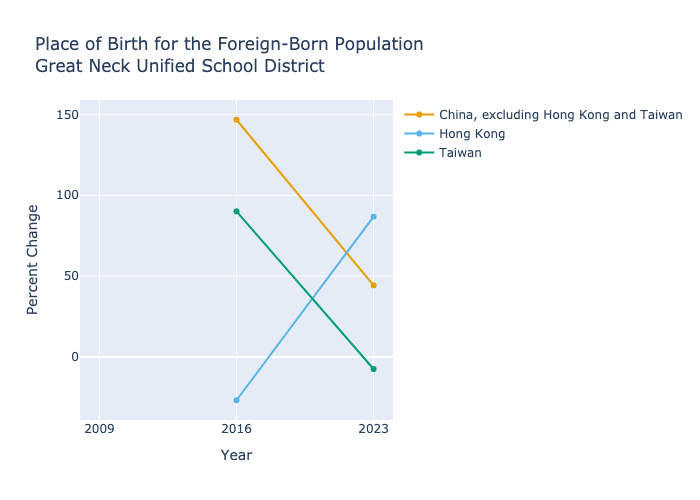

,"China, excluding Hong Kong and Taiwan",Hong Kong,Taiwan,Year
0,NaN,NaN,NaN,2009
0,146.7,-26.7,90.1,2016
0,44.3,86.8,-7.4,2023


In [4]:
from utils import pct_change_multiyear

df_pct_change = pct_change_multiyear(df)
graph_multiyear(
    df_pct_change,
    "Place of Birth for the Foreign-Born Population<br>Great Neck Unified School District",
    "Percent Change",
)

df_pct_change

So between 2009 and 2014 the number of residents from Mainland China more than doubled, while the number from Hong Kong decreased and the number from Taiwan "only" went up by 50%. 

But between 2019 and 2014 the rate of change in the respective categories dramatically changed: while Mainland China still had the largest increase, all the countries were in a relatively dight band (33-48%). This required Hong Kong to go from -15% to 45%.